In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [157]:
data_tables1=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_S1_revised_180420.csv', header=0)
data_table2=pd.read_csv('/Users/smoron/Documents/1.Projects/Thermochron/Thermochron_revisions/Table_2_revised_180420.csv', header=0)

In [158]:
samples_t2=np.unique(data_table2.Sample_N)
samples_s1=np.unique(data_tables1.SampleID)

In [70]:
cmap = plt.get_cmap('nipy_spectral')
norm = mcolors.Normalize(vmin=0, vmax=(len(samples_t2))-1)

timestep=np.arange(0,len(samples_t2),1)
def get_colour(timestep):
    return cmap(norm(timestep))
c=cmap(norm(timestep))

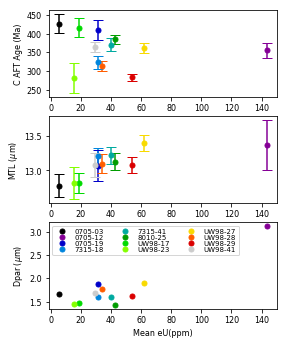

In [159]:
fig, axs = plt.subplots(3,1, figsize=((19/2)/2.5, (23/2)/2.5))

lfs=7
lbp=0
lls=0.00001
ls=8
ms=5
###
ax = axs[0]
for i in np.arange(0,len(samples_t2),1):
    ax.errorbar(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]]),
                data_table2.Central_age_Ma[data_table2.Sample_N==samples_t2[i]],
                yerr=data_table2.Central_age_Ma_1s[data_table2.Sample_N==samples_t2[i]],
                fmt='o', capsize=5,ms=ms,c=c[i])
    
    ax.set_ylabel(ylabel='C AFT Age (Ma)', fontdict={'fontsize': ls})
    ax.tick_params(axis='both', which='major', labelsize=ls)

ax = axs[1]
for i in np.arange(0,len(samples_t2),1):
    ax.errorbar(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]]),
                data_table2.Mean_track_length_um[data_table2.Sample_N==samples_t2[i]],
                yerr=data_table2.Mean_track_length_um_SE[data_table2.Sample_N==samples_t2[i]],
                fmt='o', capsize=5,ms=ms,c=c[i])
    #baxes()
    ax.set_ylabel('MTL ($\mu$m)', fontdict={'fontsize': ls})
    ax.tick_params(axis='both', which='major', labelsize=ls)

ax = axs[2]
for i in np.arange(0,len(samples_t2),1):
    ax.plot(np.mean(data_tables1.eU_ppm[data_tables1.SampleID==samples_s1[i]]),
                data_table2.Dpar_um[data_table2.Sample_N==samples_t2[i]],
                'o',ms=ms,c=c[i], label=samples_t2[i])
    ax.set_xlabel('Mean eU(ppm)', fontdict={'fontsize': ls})
    ax.set_ylabel('Dpar ($\mu$m)', fontdict={'fontsize': ls})
    ax.tick_params(axis='both', which='major', labelsize=ls)

#plt.grid()


plt.tight_layout(pad=0)
ax.legend( loc='best', ncol=3, fontsize=lfs, labelspacing=lls)

#ax.legend(bbox_to_anchor=(0, -1.2), loc=3, ncol=3, fontsize=lfs, labelspacing=lls)
fig.savefig("C_AFT_age_&MTL&Dpar_vs_eU_nipy_spectral.pdf", dpi=300)
